In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import cv2
from skimage.transform import resize

In [2]:
train_path = 'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/train'
valid_path = 'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/valid'
test_path = 'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 2959 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

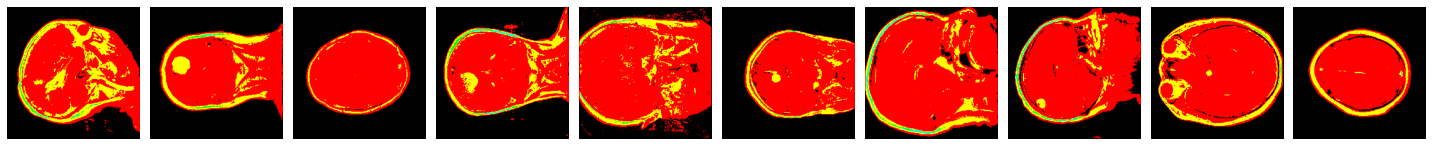

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [6]:
plotImages(imgs)
print(labels)

In [7]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [8]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [9]:
for layer in model.layers:
    layer.trainable = False

In [10]:
model.add(Dense(units=3, activation='softmax'))

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches,
    validation_data=valid_batches,
    epochs=5,
    verbose=2
)

Epoch 1/5
296/296 - 263s - loss: 0.6550 - accuracy: 0.7269 - val_loss: 0.5602 - val_accuracy: 0.7778
Epoch 2/5
296/296 - 269s - loss: 0.4444 - accuracy: 0.8209 - val_loss: 0.5248 - val_accuracy: 0.7667
Epoch 3/5
296/296 - 274s - loss: 0.3829 - accuracy: 0.8503 - val_loss: 0.4493 - val_accuracy: 0.7778
Epoch 4/5
296/296 - 273s - loss: 0.3487 - accuracy: 0.8618 - val_loss: 0.3892 - val_accuracy: 0.8111
Epoch 5/5
296/296 - 274s - loss: 0.3227 - accuracy: 0.8739 - val_loss: 0.3640 - val_accuracy: 0.8222


In [13]:
model.fit(x=train_batches,
    validation_data=valid_batches,
    epochs=5,
    verbose=2
)

Epoch 1/5
296/296 - 259s - loss: 0.3058 - accuracy: 0.8875 - val_loss: 0.3594 - val_accuracy: 0.8222
Epoch 2/5
296/296 - 270s - loss: 0.2846 - accuracy: 0.8935 - val_loss: 0.3428 - val_accuracy: 0.8111
Epoch 3/5
296/296 - 271s - loss: 0.2718 - accuracy: 0.8973 - val_loss: 0.3153 - val_accuracy: 0.8556
Epoch 4/5
296/296 - 272s - loss: 0.2623 - accuracy: 0.8996 - val_loss: 0.2953 - val_accuracy: 0.9000
Epoch 5/5
296/296 - 272s - loss: 0.2458 - accuracy: 0.9064 - val_loss: 0.2820 - val_accuracy: 0.8778


In [14]:
predictions = model.predict(x=test_batches, verbose=0)

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[5 0 0]
 [0 5 0]
 [0 0 5]]


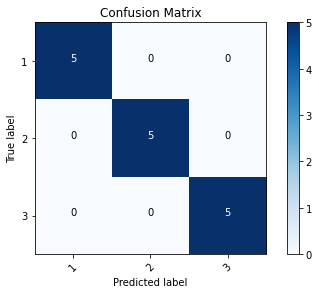

In [19]:
cm_plot_labels = ['1', '2', '3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')